In [98]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [99]:
df = pd.read_csv(r"C:\Users\DELL\Downloads\Automobile_insurance_fraud.csv", na_values=["", "?"])
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,NaN,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,6/9/2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,NaN,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,5/1/2014,IL,100/300,1000,1436.79,0,608177,...,3,NaN,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


We have to find whether fraud reported (Y/N), based on the feature columns given, so this corresponds to classification problem.

In [100]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [101]:
df.head(15)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,NaN,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,6/9/2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
5,256,39,104594,12/10/2006,OH,250/500,1000,1351.10,0,478456,...,2,NO,64100,6410,6410,51280,Saab,95,2003,Y
6,137,34,413978,4/6/2000,IN,250/500,1000,1333.35,0,441716,...,0,NaN,78650,21450,7150,50050,Nissan,Pathfinder,2012,N
7,165,37,429027,3/2/1990,IL,100/300,1000,1137.03,0,603195,...,2,YES,51590,9380,9380,32830,Audi,A5,2015,N
8,27,33,485665,5/2/1997,IL,100/300,500,1442.99,0,601734,...,1,YES,27700,2770,2770,22160,Toyota,Camry,2012,N
9,212,42,636550,25-07-2011,IL,100/300,500,1315.68,0,600983,...,1,NaN,42300,4700,4700,32900,Saab,92x,1996,N


In [102]:
df.sample()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
219,281,43,529398,16-06-1993,OH,100/300,1000,1515.18,6000000,443191,...,0,NO,60190,9260,9260,41670,BMW,X6,1999,N


# EXPLORATORY DATA ANALYSIS

In [103]:
df.shape

(1000, 39)

In [104]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [105]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [106]:
df.isnull().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [107]:
object_cols = df.select_dtypes(include='object').columns
for col in object_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

numeric_cols = df.select_dtypes(include='int64').columns
for col in numeric_cols:
    df[col].fillna(df[col].mean(), inplace=True)

missing_values = df.isnull().sum()
print("Remaining missing values:\n", missing_values)

Remaining missing values:
 months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses       

In [108]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,6/9/2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,NO,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,5/1/2014,IL,100/300,1000,1436.79,0,608177,...,3,NO,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [110]:
for i in df.columns:
    print(df[i].unique())
    print('\n')
    print(df[i].nunique())
    print('\n')

[328 228 134 256 137 165  27 212 235 447  60 121 180 473  70 140 160 196
 460 217 370 413 237   8 257 202 224 241  64 166 155 114 149 147  62 289
 431 199  79 116  37 106 269 265 163 355 175 192 430  91 223 195  22 439
  94  11 151 154 245 119 215 295 254 107 478 128 338 271 222 120 270 319
 194 227 244  78 200 284 275 153  31  41 127  61 207 219  80 325  29 239
 279 350 464 118 298  87 261 453 210 168 390 258 225 164 255 206 203 211
 274  81 280 112  24  93 171 124 287 122 398 214 209  82 193 288 104 101
 375 461 428  45 136 216 278 108  14 276  47  73 294 324  53 426 111  86
 296 125 177 238 449 252 359  19 285  30 342 468 343 404  63 335 142 272
  69  38 281 246 330 362 371 377 172  99 249 190 174  95   2 117 242 440
  20 208 156 232  84 394  35 369 332 243 264  32 259 186 201 436 189 105
  88  40  59  39 123 231 247  48 267 286 253  10 158   1  85 233 266  97
 399 305 129 283  96 176 159 290 299  66 334 429  15 230 250  65 475  77
 229 110 292 451 150 291 162 309 396 273 419 315  7

<Axes: xlabel='fraud_reported', ylabel='age'>

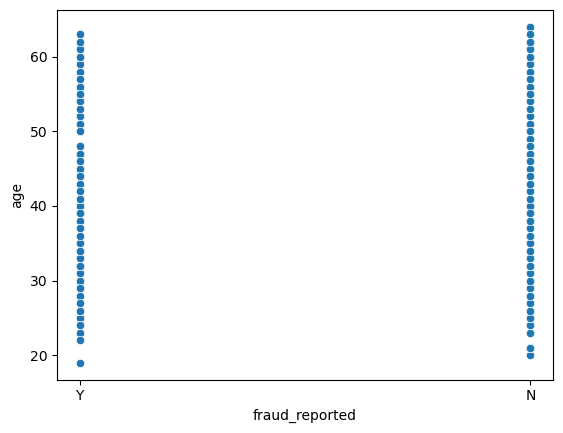

In [111]:
sns.scatterplot(y="age",x="fraud_reported",data=df)

<Axes: xlabel='incident_severity', ylabel='auto_model'>

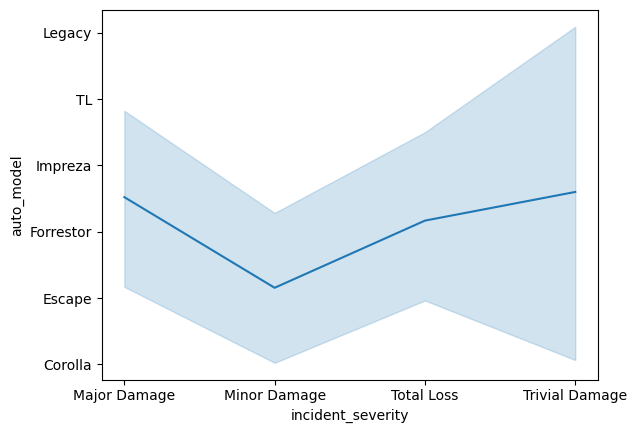

In [112]:
sns.lineplot(x="incident_severity",y="auto_model",data=df)

<Axes: xlabel='bodily_injuries', ylabel='incident_severity'>

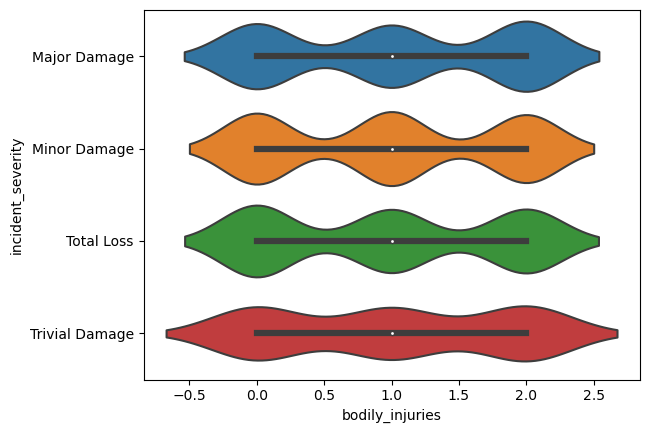

In [113]:
sns.violinplot(x="bodily_injuries",y="incident_severity",data=df)

<Axes: xlabel='policy_state', ylabel='total_claim_amount'>

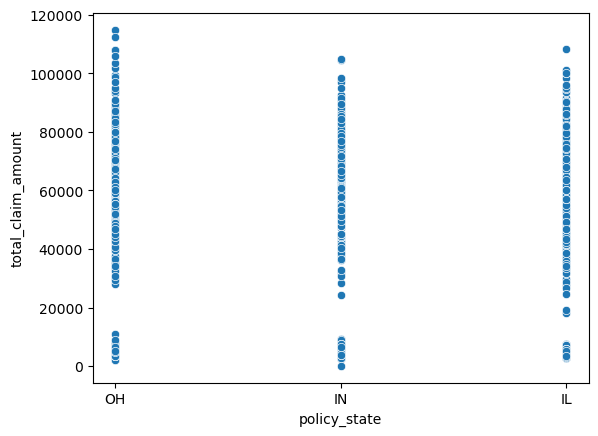

In [114]:
sns.scatterplot(y="total_claim_amount",x="policy_state",data=df)

<Axes: xlabel='fraud_reported', ylabel='insured_occupation'>

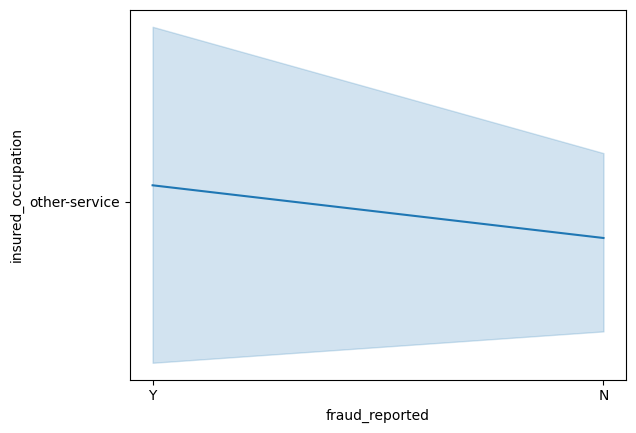

In [115]:
sns.lineplot(x="fraud_reported",y="insured_occupation",data=df)

<Axes: xlabel='collision_type', ylabel='incident_type'>

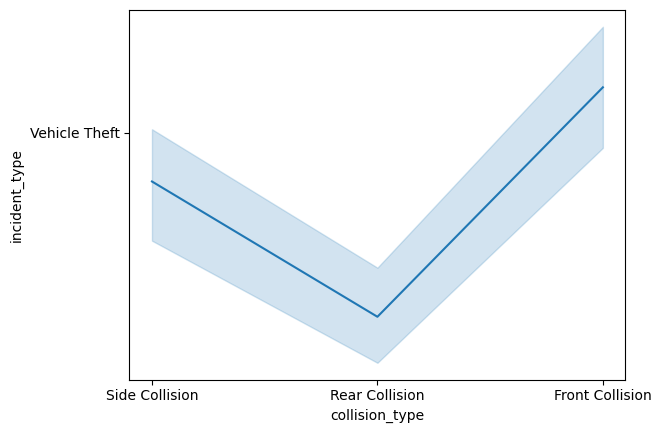

In [116]:
sns.lineplot(y="incident_type",x="collision_type",data=df)

<Axes: xlabel='fraud_reported', ylabel='insured_hobbies'>

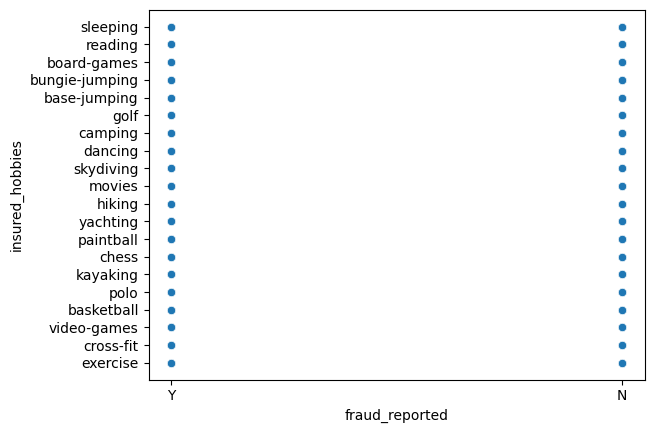

In [117]:
sns.scatterplot(x="fraud_reported",y="insured_hobbies",data=df)

<Axes: xlabel='collision_type', ylabel='count'>

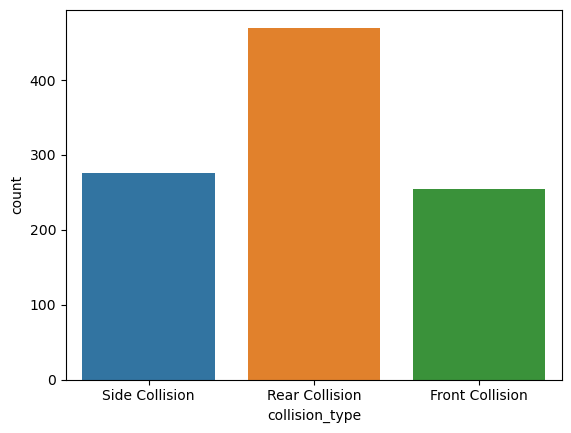

In [118]:
sns.countplot(x="collision_type",data=df)

<Axes: xlabel='incident_location', ylabel='count'>

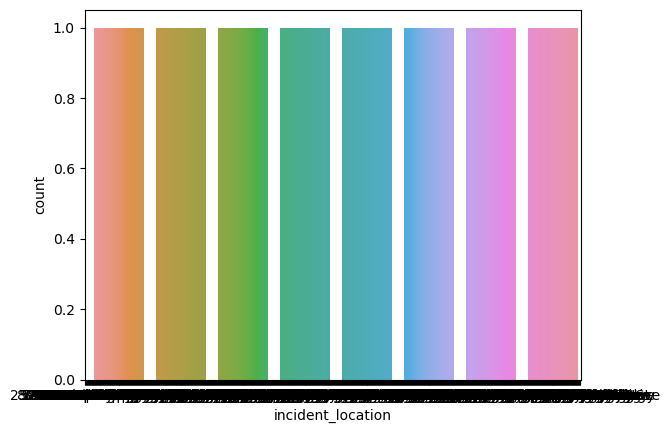

In [120]:
sns.countplot(x="incident_location",data=df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 [Text(0, 0, '92x'),
  Text(1, 0, 'E400'),
  Text(2, 0, 'RAM'),
  Text(3, 0, 'Tahoe'),
  Text(4, 0, 'RSX'),
  Text(5, 0, '95'),
  Text(6, 0, 'Pathfinder'),
  Text(7, 0, 'A5'),
  Text(8, 0, 'Camry'),
  Text(9, 0, 'F150'),
  Text(10, 0, 'A3'),
  Text(11, 0, 'Highlander'),
  Text(12, 0, 'Neon'),
  Text(13, 0, 'MDX'),
  Text(14, 0, 'Maxima'),
  Text(15, 0, 'Legacy'),
  Text(16, 0, 'TL'),
  Text(17, 0, 'Impreza'),
  Text(18, 0, 'Forrestor'),
  Text(19, 0, 'Escape'),
  Text(20, 0, 'Corolla'),
  Text(21, 0, '3 Series'),
  Text(22, 0, 'C300'),
  Text(23, 0, 'Wrangler'),
  Text(24, 0, 'M5'),
  Text(25, 0, 'X5'),
  Text(26, 0, 'Civic'),
  Text(27, 0, 'Passat'),
  Text(28, 0, 'Silverado'),
  Text(29, 0, 'CRV'),
  Text(30, 0, '93'),
  Text(31, 0, 'Accord'),
  Text(32, 0, 'X6'),
  Text(33, 0, 'Malibu'),
  Text(34, 0, 'F

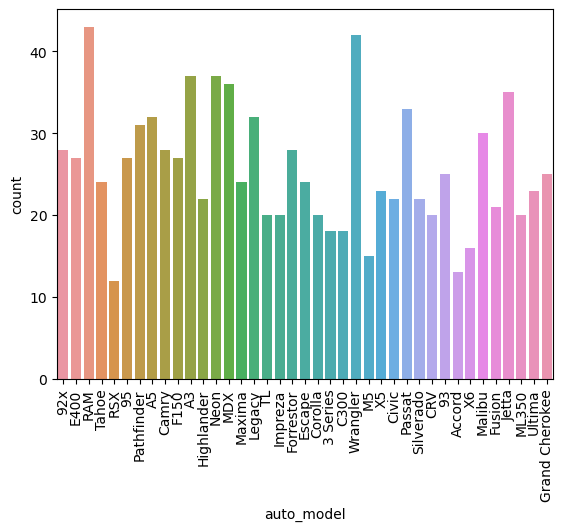

In [121]:
sns.countplot(x="auto_model",data=df)
plt.xticks(rotation=90)

<Axes: xlabel='property_damage', ylabel='count'>

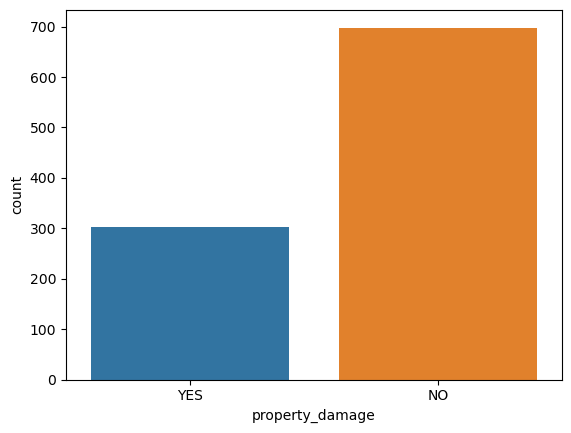

In [122]:
sns.countplot(x="property_damage",data=df)

<Axes: xlabel='months_as_customer', ylabel='age'>

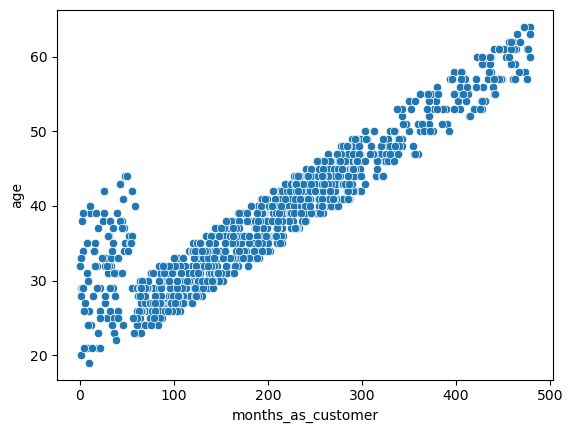

In [123]:
sns.scatterplot(y="age",x="months_as_customer",data=df)

There is a positive relationship between these two columns, when age increase the months as customer also increases

<Axes: xlabel='policy_state', ylabel='total_claim_amount'>

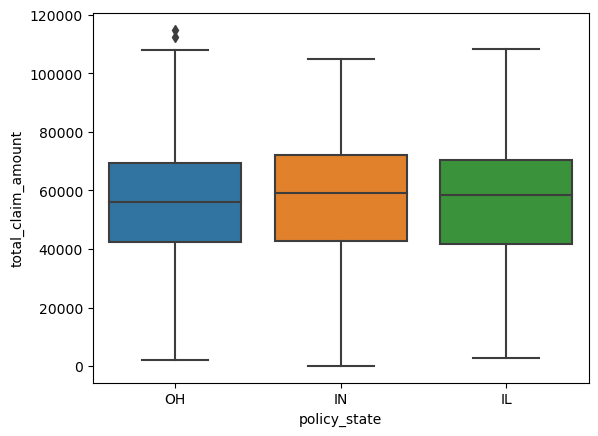

In [124]:
sns.boxplot(x="policy_state",y="total_claim_amount",data=df)

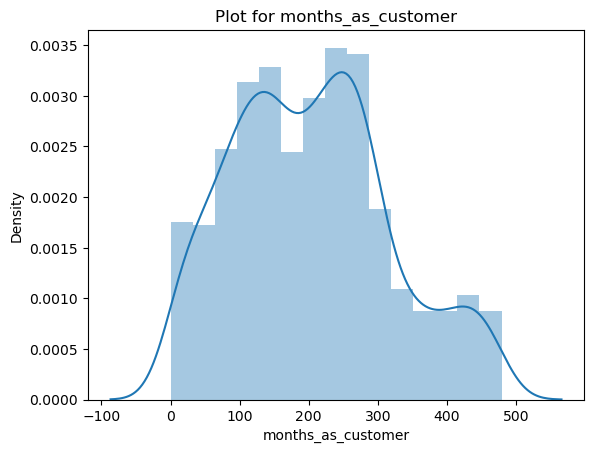

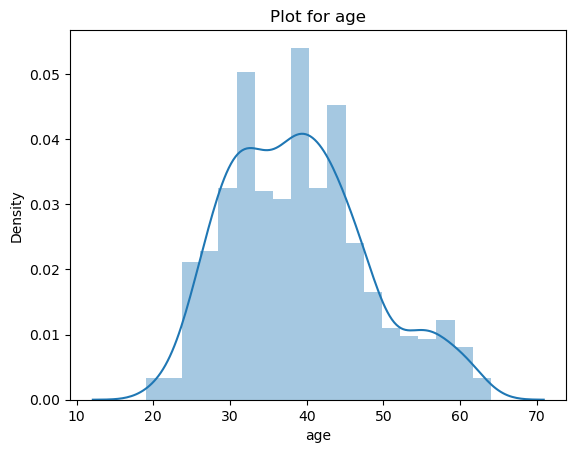

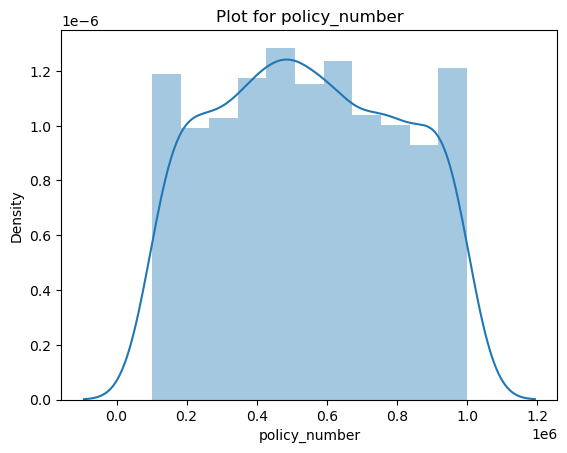

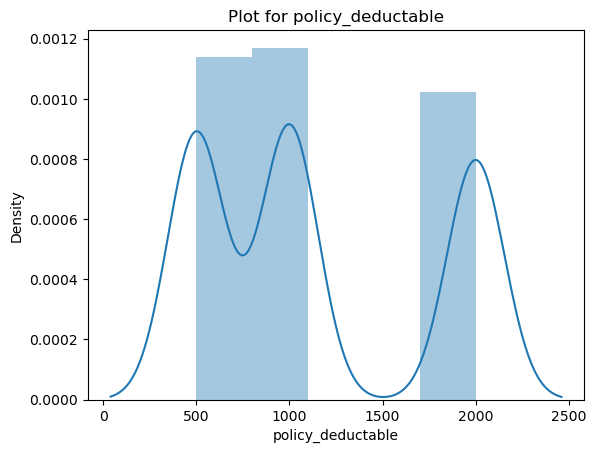

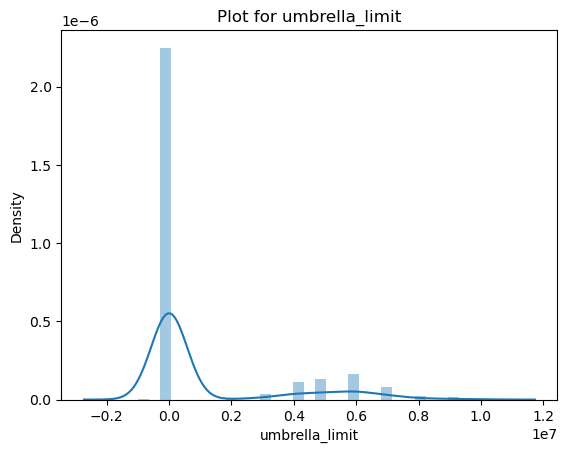

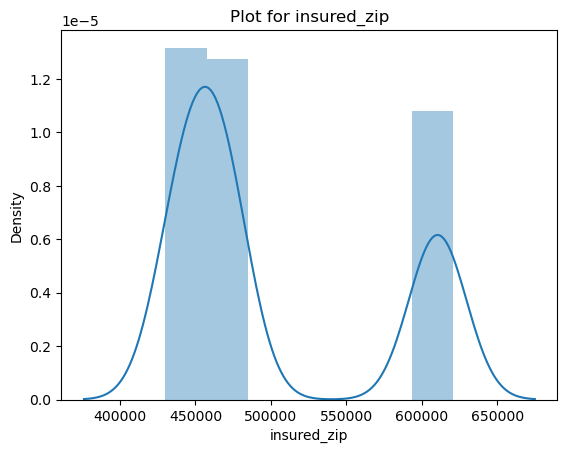

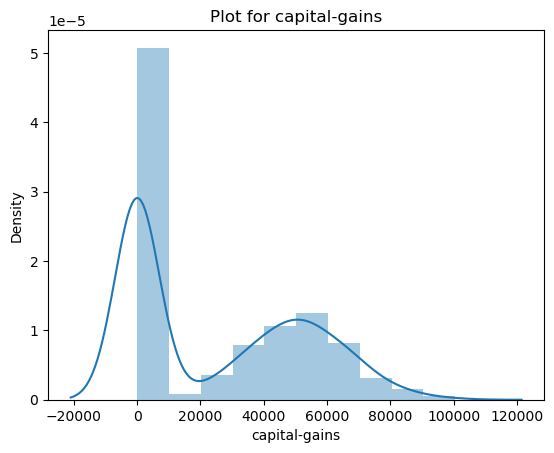

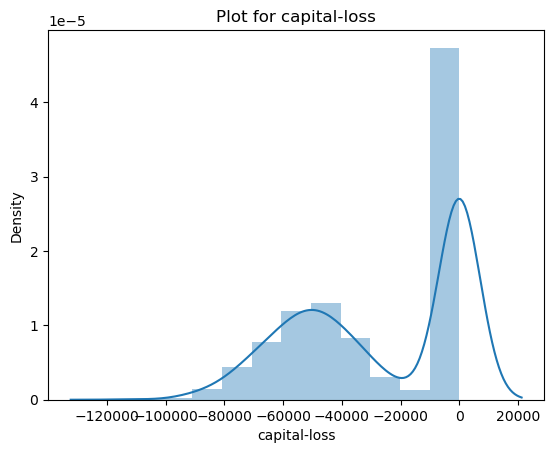

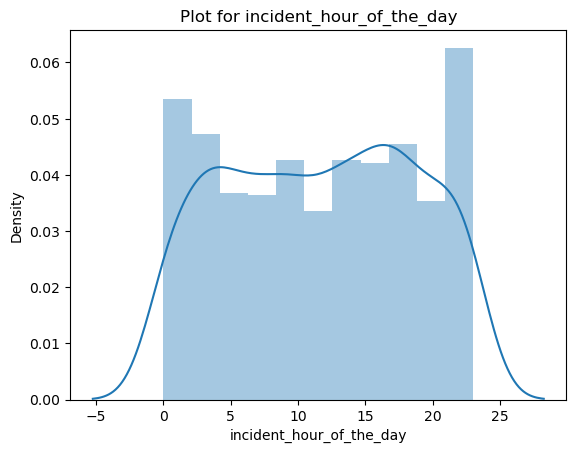

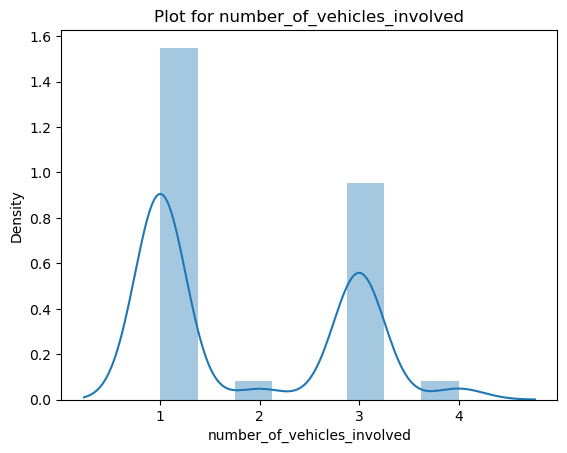

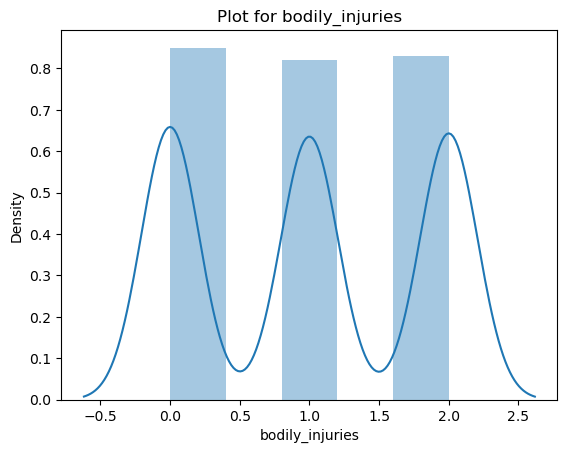

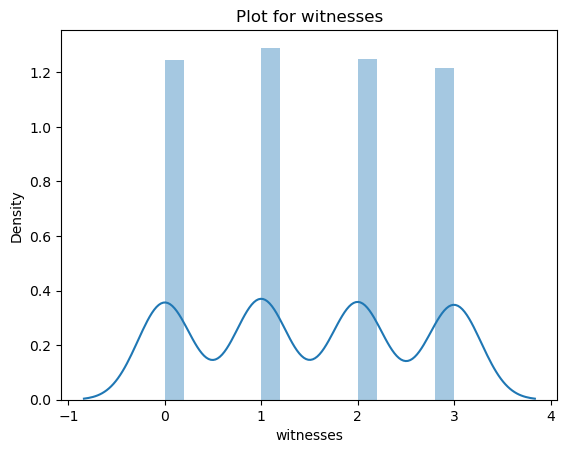

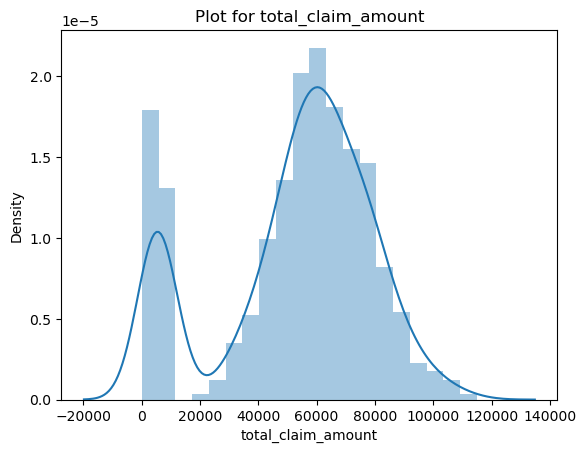

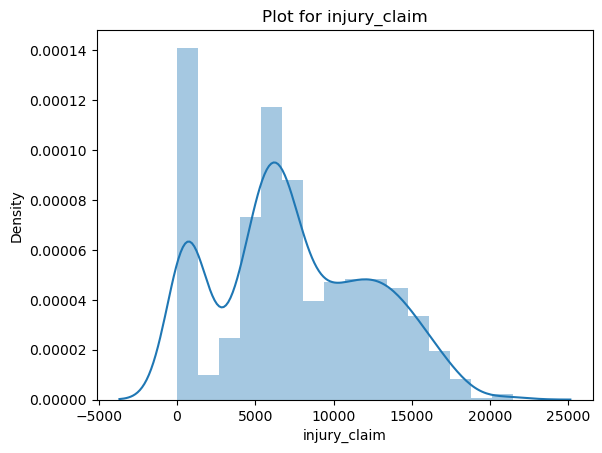

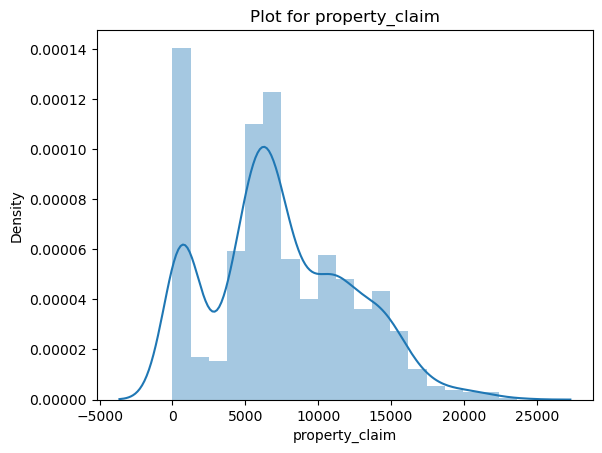

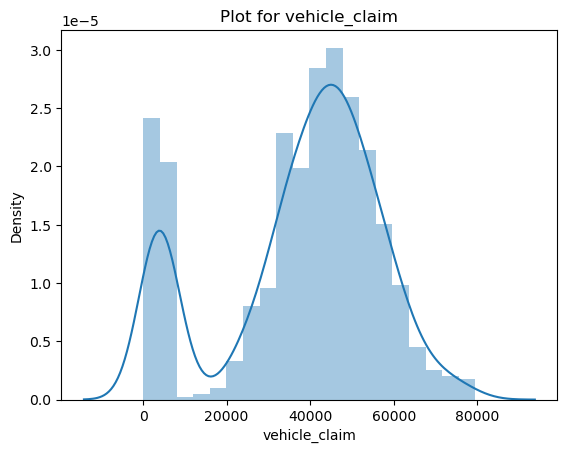

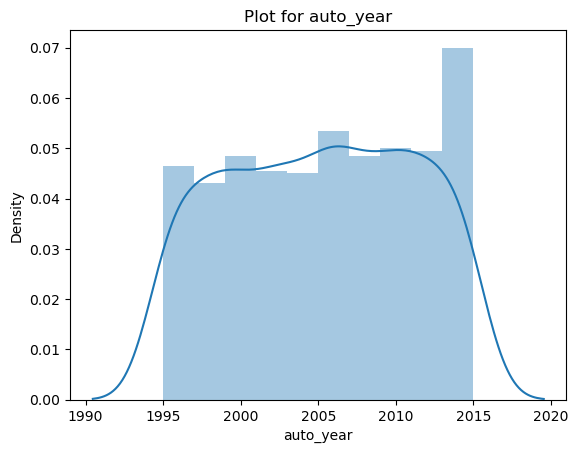

In [125]:
for column in df.columns:
    if df[column].dtype=="int64":
        sns.distplot(df[column])
        plt.title(f'Plot for {column}')
        plt.show()
        print("\n")

# checking for skewness

In [126]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,6/9/2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,NO,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,5/1/2014,IL,100/300,1000,1436.79,0,608177,...,3,NO,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [127]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
dtype: float64

In [128]:
duplicates_exist = df.duplicated().any()

if duplicates_exist:
    print("There are duplicates in the dataset.")
else:
    print("There are no duplicates in the dataset.")

There are no duplicates in the dataset.


In [129]:
df["umbrella_limit"] = np.cbrt(df["umbrella_limit"])

In [130]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.523380
insured_zip                    0.816554
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
dtype: float64

In [131]:
df["umbrella_limit"] = np.cbrt(df["umbrella_limit"])

In [132]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.474321
insured_zip                    0.816554
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
dtype: float64

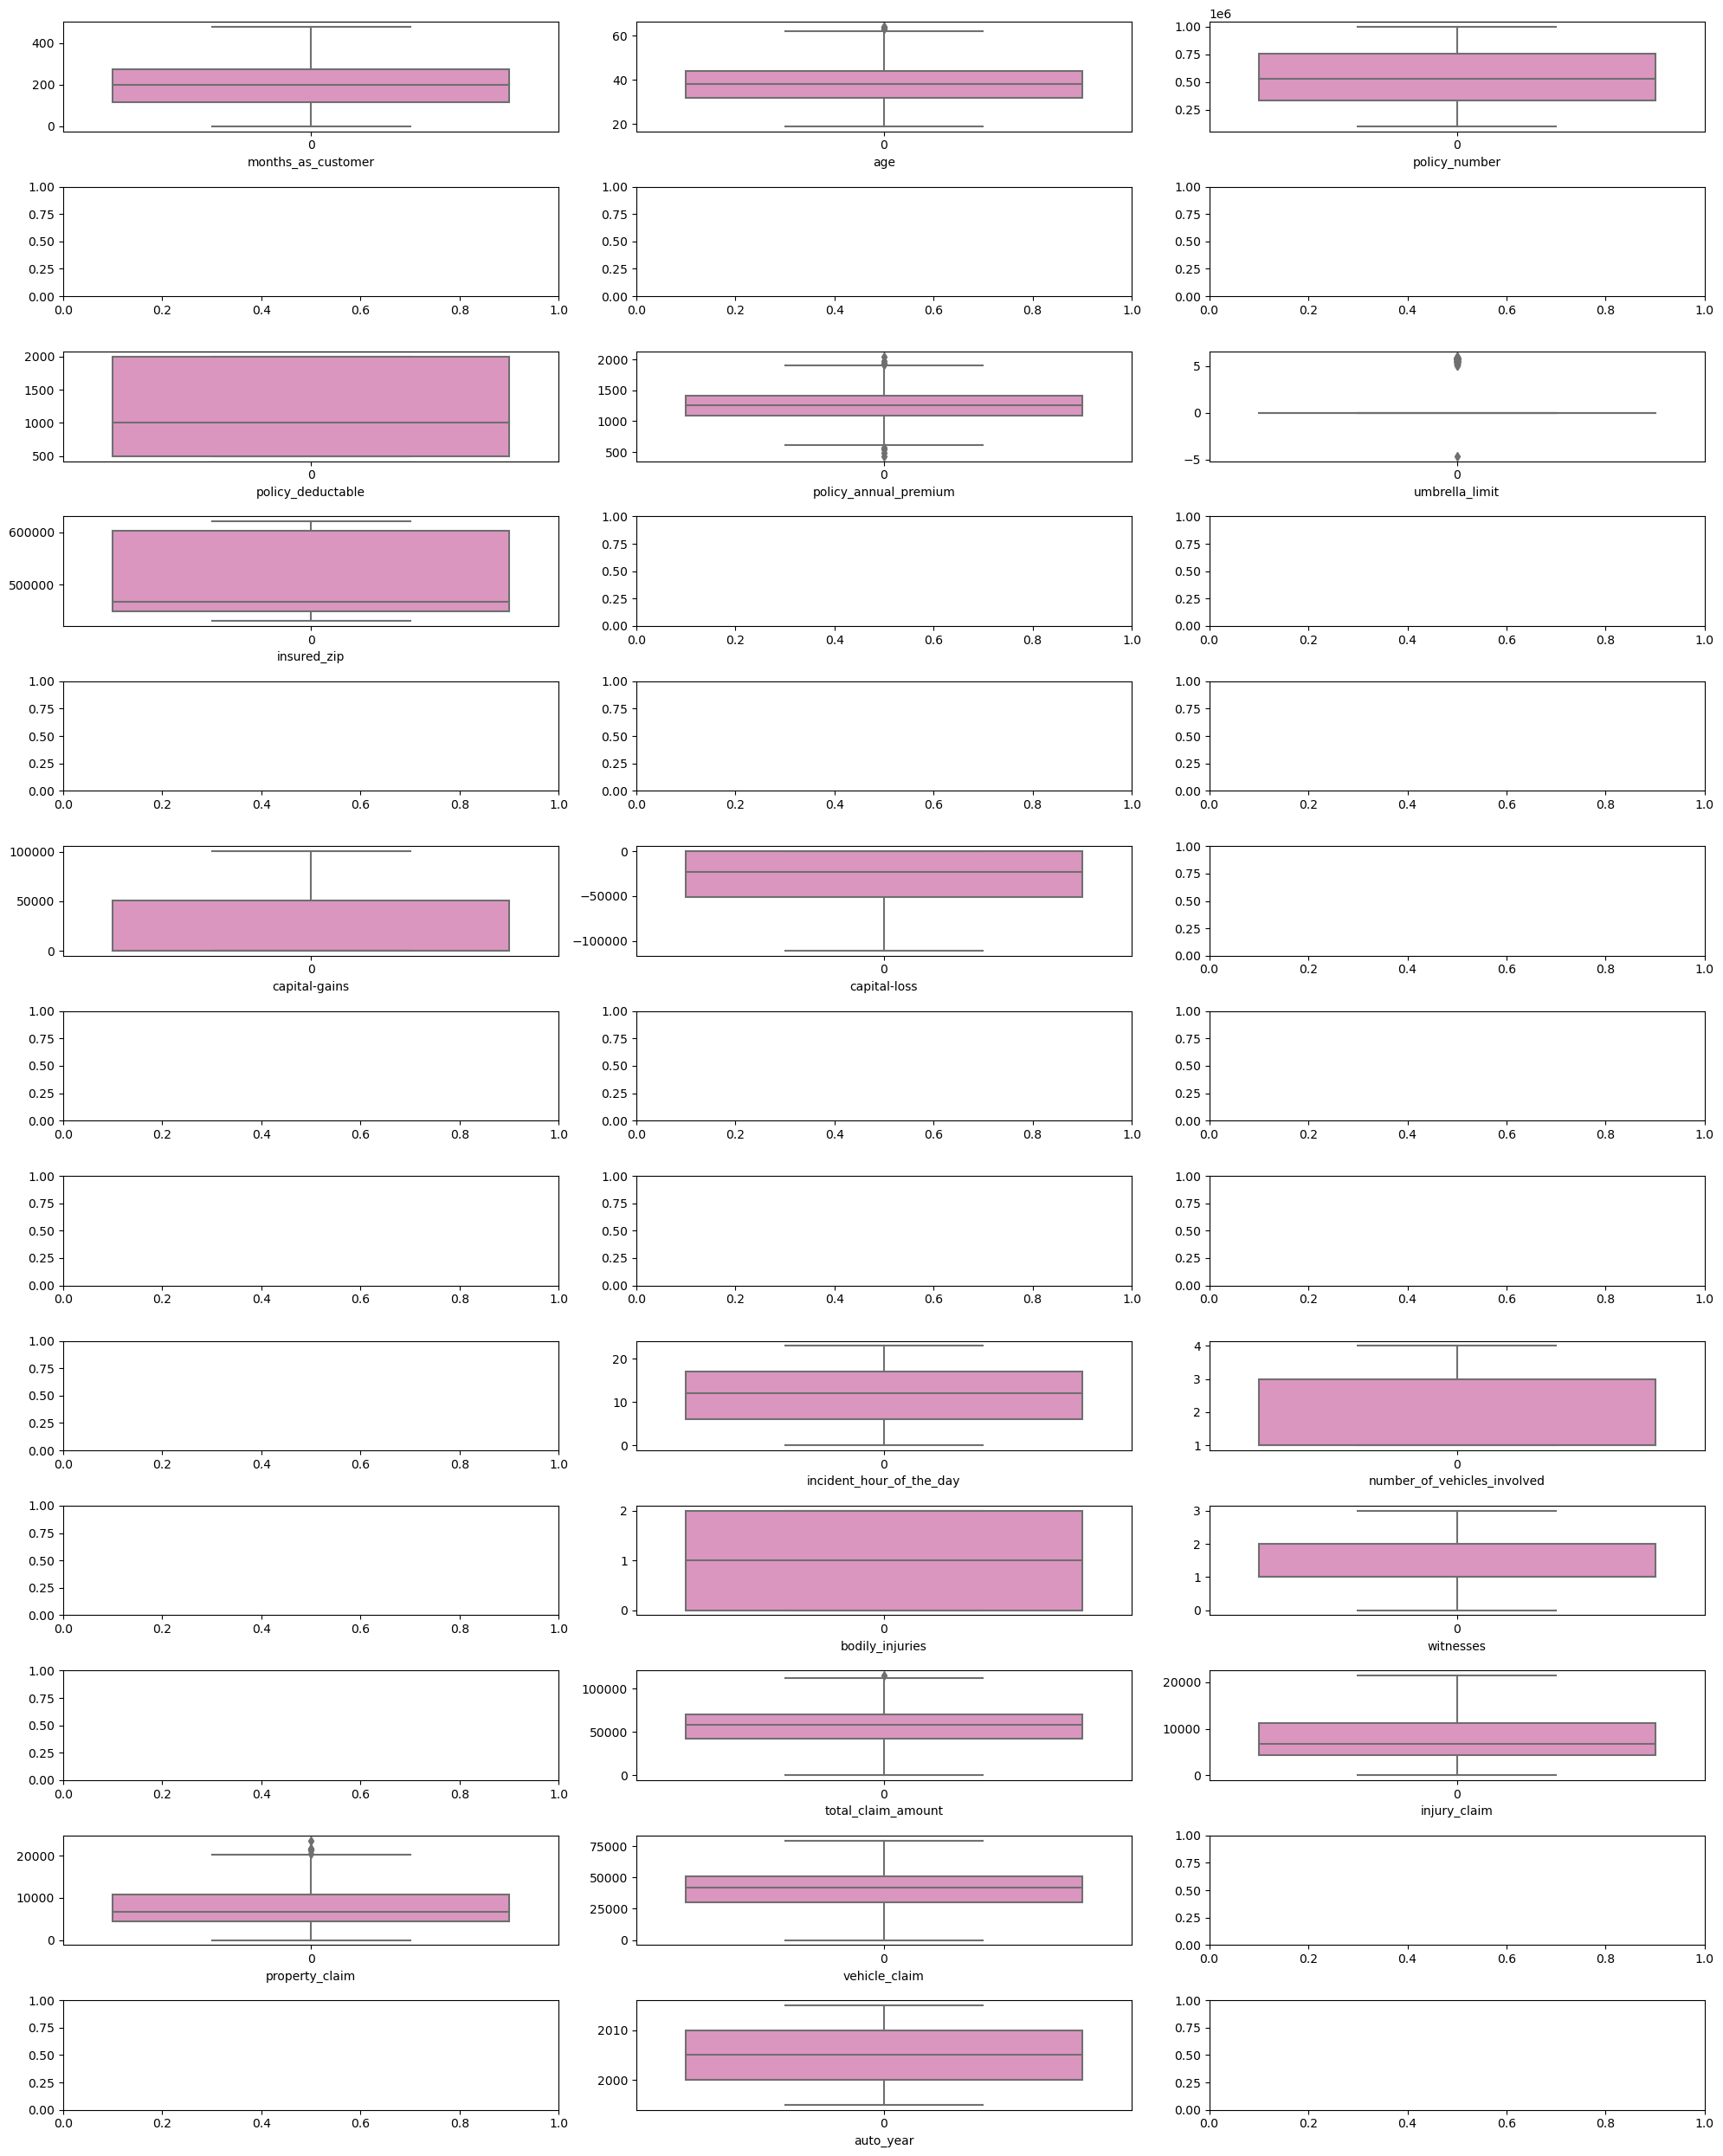

In [133]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 25))
p = 1

for i in df.columns:
    if p <= 39:
        plt.subplot(13, 3, p)

        if df[i].dtype in ['float64', 'int64']:
            sns.boxplot(df[i], palette='Set2_r')
            plt.xlabel(i)
    p += 1

plt.tight_layout()
plt.show()

In [134]:
#checking outliers using z score
from scipy.stats import zscore 
out_features = df[["months_as_customer", "age", "policy_number", "policy_deductable", "policy_annual_premium", "umbrella_limit", "insured_zip", "capital-gains", "capital-loss", "incident_hour_of_the_day", "number_of_vehicles_involved", "bodily_injuries", "witnesses", "total_claim_amount", "injury_claim", "property_claim", "vehicle_claim", "auto_year"
]]
z=np.abs(zscore(out_features))
z

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
0,1.078140,0.990836,0.095953,0.222383,0.616705,0.497594,0.489529,1.011331,0.953851,0.956261,0.823865,0.009759,0.461838,0.714257,0.189283,1.165505,0.749653,0.183440
1,0.208995,0.334073,0.791527,1.412784,0.242521,1.972421,0.461008,0.901927,0.953851,0.524475,0.823865,1.210174,1.338700,1.807312,1.363822,1.372696,1.823346,0.315491
2,0.608002,1.088913,0.550566,1.412784,0.642233,1.972421,0.984885,0.358023,0.953851,0.668404,1.140056,1.229693,1.362107,0.686362,0.054644,0.736072,0.785565,0.315491
3,0.452355,0.224613,1.239334,1.412784,0.652886,2.022968,1.491682,0.853388,1.267577,0.956261,0.823865,0.009759,0.461838,0.403135,0.224130,0.219722,0.677607,1.479664
4,0.208995,0.552994,0.695834,0.222383,1.341980,2.022968,1.527808,1.467210,0.683741,1.202666,0.823865,1.210174,0.438431,1.753121,1.257232,1.399654,1.768252,0.648112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.746582,0.103769,1.539740,0.222383,0.222884,0.497594,0.975717,0.901927,0.953851,1.202666,0.823865,1.210174,0.438431,1.305049,2.051155,0.273817,1.224309,0.149180
996,0.704407,0.224613,1.398429,0.222383,0.739141,0.497594,1.492519,1.643100,0.953851,1.634452,0.823865,1.229693,1.362107,2.111466,2.182342,2.214794,1.821868,1.645974
997,0.642767,0.541611,1.448920,1.039966,0.520739,1.836131,0.815138,0.358023,0.953851,1.100189,1.140056,1.229693,1.362107,0.558507,0.013648,0.020826,0.771902,1.513924
998,2.208028,2.523284,0.047867,1.412784,0.411866,1.972421,0.830250,0.901927,0.953851,1.388046,0.823865,1.210174,0.438431,0.219110,0.453708,0.451976,0.073580,1.181303


In [135]:
np.where(z>3)

(array([229, 248, 500, 763, 807], dtype=int64),
 array([ 4,  4, 15,  4,  8], dtype=int64))

In [136]:
df1 = df[(z<3).all(axis = 1)]
df1

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0.000000,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5.550473,468176,...,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,6/9/2000,OH,100/300,2000,1413.14,5.550473,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,5.664061,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,6/6/2014,IL,500/1000,1000,1583.91,5.664061,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0.000000,431289,...,1,NO,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,5/1/2014,IL,100/300,1000,1436.79,0.000000,608177,...,3,NO,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,5.244211,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5.550473,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [137]:
df1.skew()

months_as_customer             0.358958
age                            0.473974
policy_number                  0.031833
policy_deductable              0.475849
policy_annual_premium          0.033107
umbrella_limit                 1.466508
insured_zip                    0.824182
capital-gains                  0.479472
capital-loss                  -0.379708
incident_hour_of_the_day      -0.040232
number_of_vehicles_involved    0.503045
bodily_injuries                0.012979
witnesses                      0.027371
total_claim_amount            -0.591848
injury_claim                   0.270253
property_claim                 0.359528
vehicle_claim                 -0.618189
auto_year                     -0.049758
dtype: float64

# Checking correlation

In [138]:
df1

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0.000000,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5.550473,468176,...,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,6/9/2000,OH,100/300,2000,1413.14,5.550473,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,5.664061,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,6/6/2014,IL,500/1000,1000,1583.91,5.664061,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0.000000,431289,...,1,NO,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,5/1/2014,IL,100/300,1000,1436.79,0.000000,608177,...,3,NO,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,5.244211,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5.550473,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [139]:
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in df1.columns:
    if df1[i].dtypes=='object':
        df1[i] = OE.fit_transform(df1[i].values.reshape(-1,1))
    
df1

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,266.0,2.0,1.0,1000,1406.91,0.000000,466132,...,2,1.0,71610,6510,13020,52080,10.0,1.0,2004,1.0
1,228,42,342868,581.0,1.0,1.0,2000,1197.22,5.550473,468176,...,0,0.0,5070,780,780,3510,8.0,12.0,2007,1.0
2,134,29,687698,847.0,2.0,0.0,2000,1413.14,5.550473,430632,...,3,0.0,34650,7700,3850,23100,4.0,30.0,2007,0.0
3,256,41,227811,526.0,0.0,1.0,2000,1415.74,5.664061,608117,...,2,0.0,63400,6340,6340,50720,3.0,34.0,2014,1.0
4,228,44,367455,842.0,0.0,2.0,1000,1583.91,5.664061,610706,...,1,0.0,6500,1300,650,4550,0.0,31.0,2009,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,221.0,2.0,2.0,1000,1310.80,0.000000,431289,...,1,0.0,87200,17440,8720,61040,6.0,6.0,2006,0.0
996,285,41,186934,781.0,0.0,0.0,1000,1436.79,0.000000,608177,...,3,0.0,108480,18080,18080,72320,13.0,28.0,2015,0.0
997,130,34,918516,243.0,2.0,1.0,500,1383.49,5.244211,442797,...,3,1.0,67500,7500,7500,52500,11.0,19.0,1996,0.0
998,458,62,533940,307.0,0.0,2.0,2000,1356.92,5.550473,441714,...,1,1.0,46980,5220,5220,36540,1.0,5.0,1998,0.0


In [140]:
cor=df1.corr()
cor

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
months_as_customer,1.000000,0.922092,0.057195,-0.046097,0.000115,-0.022954,0.023763,-0.003318,0.001434,0.023366,...,0.063811,-0.018874,0.064344,0.066612,0.041345,0.062170,0.049048,0.002689,0.001017,0.020878
age,0.922092,1.000000,0.059107,-0.045622,-0.015184,-0.012423,0.026951,0.005931,-0.001328,0.030544,...,0.056859,-0.018570,0.070098,0.075626,0.064375,0.062025,0.031987,0.016125,0.003092,0.012348
policy_number,0.057195,0.059107,1.000000,-0.035217,0.071604,0.038045,-0.004584,0.028730,-0.001280,0.004874,...,-0.008150,0.027770,-0.017407,-0.008552,-0.009989,-0.019570,0.017958,0.061747,-0.005670,-0.034866
policy_bind_date,-0.046097,-0.045622,-0.035217,1.000000,-0.062456,-0.006727,0.032859,0.063699,0.039038,0.027586,...,-0.044208,-0.047257,-0.022720,-0.038399,-0.010140,-0.019241,-0.013648,-0.013088,-0.002636,-0.015363
policy_state,0.000115,-0.015184,0.071604,-0.062456,1.000000,-0.000347,0.010776,0.014483,-0.022044,0.007673,...,0.024857,0.065959,-0.008486,-0.046403,0.002698,-0.000549,0.015838,-0.024562,0.002296,0.028858
policy_csl,-0.022954,-0.012423,0.038045,-0.006727,-0.000347,1.000000,0.006065,0.030842,0.019602,0.002928,...,0.069239,-0.005405,-0.058376,-0.080579,-0.048278,-0.048461,-0.006483,0.048485,-0.034835,-0.038765
policy_deductable,0.023763,0.026951,-0.004584,0.032859,0.010776,0.006065,1.000000,-0.008983,0.001853,0.009180,...,0.067627,0.041976,0.023520,0.038980,0.068190,0.005452,-0.032381,-0.001652,0.029947,0.016663
policy_annual_premium,-0.003318,0.005931,0.028730,0.063699,0.014483,0.030842,-0.008983,1.000000,-0.004643,0.048649,...,0.005857,0.029882,0.003252,-0.024420,-0.008353,0.012977,0.012124,-0.034517,-0.039869,-0.009961
umbrella_limit,0.001434,-0.001328,-0.001280,0.039038,-0.022044,0.019602,0.001853,-0.004643,1.000000,0.011674,...,-0.006703,-0.051707,-0.038794,-0.042019,-0.020205,-0.038203,0.008607,0.027221,0.009950,0.060627
insured_zip,0.023366,0.030544,0.004874,0.027586,0.007673,0.002928,0.009180,0.048649,0.011674,1.000000,...,0.017586,0.005131,-0.032730,-0.015154,-0.010735,-0.039083,-0.026433,0.024189,-0.038110,0.017566


In [141]:
cor['fraud_reported'].sort_values(ascending = False)

fraud_reported                 1.000000
vehicle_claim                  0.170992
total_claim_amount             0.164476
property_claim                 0.139258
injury_claim                   0.090536
umbrella_limit                 0.060627
witnesses                      0.052128
number_of_vehicles_involved    0.049307
bodily_injuries                0.036225
insured_sex                    0.031656
policy_state                   0.028858
months_as_customer             0.020878
insured_relationship           0.018546
insured_zip                    0.017566
property_damage                0.016897
policy_deductable              0.016663
age                            0.012348
insured_education_level        0.011532
incident_hour_of_the_day       0.004986
insured_occupation             0.003815
auto_year                      0.003798
auto_model                    -0.002210
incident_location             -0.006513
policy_annual_premium         -0.009961
incident_date                 -0.012120


<Axes: >

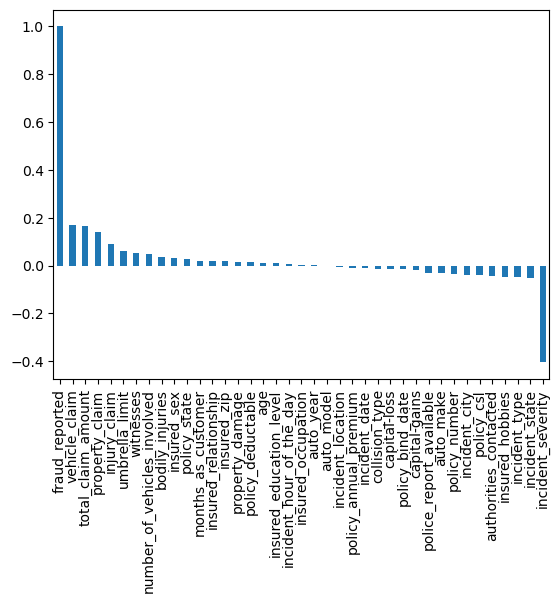

In [142]:
cor['fraud_reported'].sort_values(ascending = False).plot(kind='bar')

# Feature scaling and standardisation

In [143]:
df1

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,266.0,2.0,1.0,1000,1406.91,0.000000,466132,...,2,1.0,71610,6510,13020,52080,10.0,1.0,2004,1.0
1,228,42,342868,581.0,1.0,1.0,2000,1197.22,5.550473,468176,...,0,0.0,5070,780,780,3510,8.0,12.0,2007,1.0
2,134,29,687698,847.0,2.0,0.0,2000,1413.14,5.550473,430632,...,3,0.0,34650,7700,3850,23100,4.0,30.0,2007,0.0
3,256,41,227811,526.0,0.0,1.0,2000,1415.74,5.664061,608117,...,2,0.0,63400,6340,6340,50720,3.0,34.0,2014,1.0
4,228,44,367455,842.0,0.0,2.0,1000,1583.91,5.664061,610706,...,1,0.0,6500,1300,650,4550,0.0,31.0,2009,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,221.0,2.0,2.0,1000,1310.80,0.000000,431289,...,1,0.0,87200,17440,8720,61040,6.0,6.0,2006,0.0
996,285,41,186934,781.0,0.0,0.0,1000,1436.79,0.000000,608177,...,3,0.0,108480,18080,18080,72320,13.0,28.0,2015,0.0
997,130,34,918516,243.0,2.0,1.0,500,1383.49,5.244211,442797,...,3,1.0,67500,7500,7500,52500,11.0,19.0,1996,0.0
998,458,62,533940,307.0,0.0,2.0,2000,1356.92,5.550473,441714,...,1,1.0,46980,5220,5220,36540,1.0,5.0,1998,0.0


In [144]:
x=df1.drop("fraud_reported", axis=1)
y=df1['fraud_reported']

In [145]:
x.shape

(995, 38)

In [146]:
y.shape

(995,)

In [147]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
0,1.073984,0.986592,-0.098277,-0.769011,1.185517,0.063692,-0.223417,0.621478,-0.499153,-0.487607,...,0.008593,0.468407,1.479562,0.716696,-0.187157,1.175508,0.750846,0.856250,-1.646932,-0.184194
1,0.204584,0.330183,-0.794521,0.379969,-0.018146,0.063692,1.411141,-0.250891,1.966213,-0.459038,...,-1.212826,-1.334551,-0.675876,-1.807055,-1.362033,-1.375940,-1.822872,0.359765,-0.659116,0.315188
2,-0.612651,-1.092035,0.548864,1.350218,1.185517,-1.178928,1.411141,0.647396,1.966213,-0.983774,...,1.230012,1.369886,-0.675876,-0.685135,0.056840,-0.735994,-0.784800,-0.633206,0.957311,0.315188
3,0.448016,0.220782,-1.242758,0.179353,-1.221808,0.063692,1.411141,0.658213,2.016665,1.496856,...,0.008593,0.468407,-0.675876,0.405305,-0.222014,-0.216949,0.678780,-0.881449,1.316517,1.480413
4,0.204584,0.548986,-0.698735,1.331980,-1.221808,1.306313,-0.223417,1.357847,2.016665,1.533041,...,-1.212826,-0.433072,-0.675876,-1.752817,-1.255413,-1.403039,-1.767762,-1.626177,1.047112,0.648109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,-1.751565,-0.107422,1.538990,-0.933151,1.185517,1.306313,-0.223417,0.221633,-0.499153,-0.974592,...,-1.212826,-0.433072,-0.675876,1.307999,2.053925,0.279166,1.225636,-0.136721,-1.197925,0.148727
991,0.700142,0.220782,-1.402007,1.109480,-1.221808,-1.178928,-0.223417,0.745787,-0.499153,1.497694,...,1.230012,1.369886,-0.675876,2.115114,2.185151,2.230274,1.823361,1.600979,0.777708,1.646873
992,-0.647427,-0.545028,1.448081,-0.852904,1.185517,0.063692,-1.040696,0.524044,1.830180,-0.813750,...,1.230012,1.369886,1.479562,0.560811,0.015832,0.024855,0.773102,1.104493,-0.030505,-1.515880
993,2.204203,2.518212,-0.050145,-0.619461,-1.221808,1.306313,1.411141,0.413506,1.966213,-0.828886,...,-1.212826,-0.433072,1.479562,-0.217478,-0.451658,-0.450415,-0.072616,-1.377934,-1.287726,-1.182958


In [148]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF values,Features
0,6.832479,months_as_customer
1,6.846840,age
2,1.026813,policy_number
3,1.037952,policy_bind_date
4,1.042002,policy_state
5,1.034684,policy_csl
6,1.039916,policy_deductable
7,1.041672,policy_annual_premium
8,1.035569,umbrella_limit
9,1.029569,insured_zip


In [149]:
x

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
0,1.073984,0.986592,-0.098277,-0.769011,1.185517,0.063692,-0.223417,0.621478,-0.499153,-0.487607,...,0.008593,0.468407,1.479562,0.716696,-0.187157,1.175508,0.750846,0.856250,-1.646932,-0.184194
1,0.204584,0.330183,-0.794521,0.379969,-0.018146,0.063692,1.411141,-0.250891,1.966213,-0.459038,...,-1.212826,-1.334551,-0.675876,-1.807055,-1.362033,-1.375940,-1.822872,0.359765,-0.659116,0.315188
2,-0.612651,-1.092035,0.548864,1.350218,1.185517,-1.178928,1.411141,0.647396,1.966213,-0.983774,...,1.230012,1.369886,-0.675876,-0.685135,0.056840,-0.735994,-0.784800,-0.633206,0.957311,0.315188
3,0.448016,0.220782,-1.242758,0.179353,-1.221808,0.063692,1.411141,0.658213,2.016665,1.496856,...,0.008593,0.468407,-0.675876,0.405305,-0.222014,-0.216949,0.678780,-0.881449,1.316517,1.480413
4,0.204584,0.548986,-0.698735,1.331980,-1.221808,1.306313,-0.223417,1.357847,2.016665,1.533041,...,-1.212826,-0.433072,-0.675876,-1.752817,-1.255413,-1.403039,-1.767762,-1.626177,1.047112,0.648109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,-1.751565,-0.107422,1.538990,-0.933151,1.185517,1.306313,-0.223417,0.221633,-0.499153,-0.974592,...,-1.212826,-0.433072,-0.675876,1.307999,2.053925,0.279166,1.225636,-0.136721,-1.197925,0.148727
991,0.700142,0.220782,-1.402007,1.109480,-1.221808,-1.178928,-0.223417,0.745787,-0.499153,1.497694,...,1.230012,1.369886,-0.675876,2.115114,2.185151,2.230274,1.823361,1.600979,0.777708,1.646873
992,-0.647427,-0.545028,1.448081,-0.852904,1.185517,0.063692,-1.040696,0.524044,1.830180,-0.813750,...,1.230012,1.369886,1.479562,0.560811,0.015832,0.024855,0.773102,1.104493,-0.030505,-1.515880
993,2.204203,2.518212,-0.050145,-0.619461,-1.221808,1.306313,1.411141,0.413506,1.966213,-0.828886,...,-1.212826,-0.433072,1.479562,-0.217478,-0.451658,-0.450415,-0.072616,-1.377934,-1.287726,-1.182958


In [150]:
x.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year'],
      dtype='object')

In [151]:
x.drop(["total_claim_amount", "property_claim", "vehicle_claim"], axis=1, inplace=True)

In [152]:
x

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,auto_make,auto_model,auto_year
0,1.073984,0.986592,-0.098277,-0.769011,1.185517,0.063692,-0.223417,0.621478,-0.499153,-0.487607,...,-0.961696,-0.823907,1.514827,0.008593,0.468407,1.479562,-0.187157,0.856250,-1.646932,-0.184194
1,0.204584,0.330183,-0.794521,0.379969,-0.018146,0.063692,1.411141,-0.250891,1.966213,-0.459038,...,-0.529497,-0.823907,-0.660141,-1.212826,-1.334551,-0.675876,-1.362033,0.359765,-0.659116,0.315188
2,-0.612651,-1.092035,0.548864,1.350218,1.185517,-1.178928,1.411141,0.647396,1.966213,-0.983774,...,-0.673563,1.139655,-0.660141,1.230012,1.369886,-0.675876,0.056840,-0.633206,0.957311,0.315188
3,0.448016,0.220782,-1.242758,0.179353,-1.221808,0.063692,1.411141,0.658213,2.016665,1.496856,...,-0.961696,-0.823907,-0.660141,0.008593,0.468407,-0.675876,-0.222014,-0.881449,1.316517,1.480413
4,0.204584,0.548986,-0.698735,1.331980,-1.221808,1.306313,-0.223417,1.357847,2.016665,1.533041,...,1.199296,-0.823907,-0.660141,-1.212826,-0.433072,-0.675876,-1.255413,-1.626177,1.047112,0.648109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,-1.751565,-0.107422,1.538990,-0.933151,1.185517,1.306313,-0.223417,0.221633,-0.499153,-0.974592,...,1.199296,-0.823907,1.514827,-1.212826,-0.433072,-0.675876,2.053925,-0.136721,-1.197925,0.148727
991,0.700142,0.220782,-1.402007,1.109480,-1.221808,-1.178928,-0.223417,0.745787,-0.499153,1.497694,...,1.631495,-0.823907,1.514827,1.230012,1.369886,-0.675876,2.185151,1.600979,0.777708,1.646873
992,-0.647427,-0.545028,1.448081,-0.852904,1.185517,0.063692,-1.040696,0.524044,1.830180,-0.813750,...,-1.105762,1.139655,-0.660141,1.230012,1.369886,1.479562,0.015832,1.104493,-0.030505,-1.515880
993,2.204203,2.518212,-0.050145,-0.619461,-1.221808,1.306313,1.411141,0.413506,1.966213,-0.828886,...,-1.393894,-0.823907,-0.660141,-1.212826,-0.433072,1.479562,-0.451658,-1.377934,-1.287726,-1.182958


In [153]:
y.value_counts()

0.0    749
1.0    246
Name: fraud_reported, dtype: int64

In [154]:
!pip install imblearn 
from imblearn.over_sampling import SMOTE 
SM = SMOTE()
x1,y1 = SM.fit_resample(x,y)

In [155]:
y1.value_counts()

1.0    749
0.0    749
Name: fraud_reported, dtype: int64

In [156]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 
max_acc = 0
rs = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.30, random_state = i)
    RFR  = RandomForestClassifier()
    RFR.fit(x_train, y_train)
    pred = RFR.predict(x_test)
    accuracy = accuracy_score(y_test, pred)
    if accuracy>max_acc:
        max_acc = accuracy
        rs = i
        
print("Best accuracy is", max_acc,"at random state", rs)

Best accuracy is 0.9155555555555556 at random state 80


In [157]:
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.30, random_state = rs) 

In [158]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, confusion_matrix
from sklearn.model_selection import cross_val_score

In [159]:
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
predRFC = RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.9
[[210  21]
 [ 24 195]]
              precision    recall  f1-score   support

         0.0       0.90      0.91      0.90       231
         1.0       0.90      0.89      0.90       219

    accuracy                           0.90       450
   macro avg       0.90      0.90      0.90       450
weighted avg       0.90      0.90      0.90       450



In [160]:
ETC = ExtraTreesClassifier()
ETC.fit(x_train, y_train)
predETC = ETC.predict(x_test)
print(accuracy_score(y_test,predETC))
print(confusion_matrix(y_test,predETC))
print(classification_report(y_test,predETC))

0.9311111111111111
[[212  19]
 [ 12 207]]
              precision    recall  f1-score   support

         0.0       0.95      0.92      0.93       231
         1.0       0.92      0.95      0.93       219

    accuracy                           0.93       450
   macro avg       0.93      0.93      0.93       450
weighted avg       0.93      0.93      0.93       450



In [161]:
LR = LogisticRegression()
LR.fit(x_train, y_train)
predLR = LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.7288888888888889
[[165  66]
 [ 56 163]]
              precision    recall  f1-score   support

         0.0       0.75      0.71      0.73       231
         1.0       0.71      0.74      0.73       219

    accuracy                           0.73       450
   macro avg       0.73      0.73      0.73       450
weighted avg       0.73      0.73      0.73       450



In [162]:
svc = SVC()
svc.fit(x_train, y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.86
[[198  33]
 [ 30 189]]
              precision    recall  f1-score   support

         0.0       0.87      0.86      0.86       231
         1.0       0.85      0.86      0.86       219

    accuracy                           0.86       450
   macro avg       0.86      0.86      0.86       450
weighted avg       0.86      0.86      0.86       450



In [163]:
ABC = AdaBoostClassifier()
ABC.fit(x_train, y_train)
predABC = ABC.predict(x_test)
print(accuracy_score(y_test,predABC))
print(confusion_matrix(y_test,predABC))
print(classification_report(y_test,predABC))

0.8733333333333333
[[209  22]
 [ 35 184]]
              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88       231
         1.0       0.89      0.84      0.87       219

    accuracy                           0.87       450
   macro avg       0.87      0.87      0.87       450
weighted avg       0.87      0.87      0.87       450



In [164]:
BC = BaggingClassifier()
BC.fit(x_train, y_train)
predBC = BC.predict(x_test)
print(accuracy_score(y_test,predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

0.8711111111111111
[[203  28]
 [ 30 189]]
              precision    recall  f1-score   support

         0.0       0.87      0.88      0.88       231
         1.0       0.87      0.86      0.87       219

    accuracy                           0.87       450
   macro avg       0.87      0.87      0.87       450
weighted avg       0.87      0.87      0.87       450



In [165]:
GBC = GradientBoostingClassifier()
GBC.fit(x_train, y_train)
predGBC = GBC.predict(x_test)
print(accuracy_score(y_test,predGBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

0.9088888888888889
[[203  28]
 [ 30 189]]
              precision    recall  f1-score   support

         0.0       0.87      0.88      0.88       231
         1.0       0.87      0.86      0.87       219

    accuracy                           0.87       450
   macro avg       0.87      0.87      0.87       450
weighted avg       0.87      0.87      0.87       450



# cross val score 

In [167]:
#Random forest 
score = cross_val_score(RFC,x1,y1)
print(score)
print(score.mean())
print("Difference is", accuracy_score(y_test,predRFC)-score.mean())

[0.74666667 0.84       0.91       0.94648829 0.93645485]
0.8759219620958751
Difference is 0.024078037904124883


In [168]:
#Extra Trees
score = cross_val_score(ETC,x1,y1)
print(score)
print(score.mean())
print("Difference is", accuracy_score(y_test,predETC)-score.mean())

[0.86       0.88666667 0.95       0.95986622 0.9632107 ]
0.9239487179487179
Difference is 0.007162393162393199


In [169]:
#Logistic regression
score = cross_val_score(LR,x1,y1)
print(score)
print(score.mean())
print("Difference is", accuracy_score(y_test,predLR)-score.mean())

[0.70666667 0.73       0.7        0.72575251 0.75250836]
0.7229855072463768
Difference is 0.00590338164251214


In [170]:
#SVC
score = cross_val_score(svc,x1,y1)
print(score)
print(score.mean())
print("Difference is", accuracy_score(y_test,predsvc)-score.mean())

[0.78333333 0.82666667 0.88       0.89632107 0.909699  ]
0.8592040133779264
Difference is 0.0007959866220735856


In [171]:
#Adaboost
score = cross_val_score(ABC,x1,y1)
print(score)
print(score.mean())
print("Difference is", accuracy_score(y_test,predABC)-score.mean())

[0.67333333 0.77333333 0.90666667 0.90635452 0.9264214 ]
0.8372218506131549
Difference is 0.03611148272017839


In [172]:
#Bagging
score = cross_val_score(BC,x1,y1)
print(score)
print(score.mean())
print("Difference is", accuracy_score(y_test,predBC)-score.mean())

[0.79       0.82       0.86666667 0.90301003 0.91638796]
0.8592129319955406
Difference is 0.01189817911557045


In [173]:
#Gradient boosting
score = cross_val_score(GBC,x1,y1)
print(score)
print(score.mean())
print("Difference is", accuracy_score(y_test,predGBC)-score.mean())

[0.76333333 0.85       0.89333333 0.92976589 0.9264214 ]
0.8725707915273133
Difference is 0.03631809736157554


Considering the cross val score and the model individual performance, selecting ETC as the best fitting model.

# Hyperparameter tuning

In [174]:
from sklearn.model_selection import GridSearchCV

parameters = {'criterion': ['gini','entropy'],
              'random_state':[10,50,5000],
              'max_depth' : [0,10,30], 
              'n_jobs' : [-2,-1,1], 
              'n_estimators':[50,100,150,200,350]}

In [175]:
GCV = GridSearchCV(ExtraTreesClassifier(), parameters, cv = 5, n_jobs=1)

In [176]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 30],
                         'n_estimators': [50, 100, 150, 200, 350],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 5000]})

In [177]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 30,
 'n_estimators': 150,
 'n_jobs': -2,
 'random_state': 10}

In [178]:
final_model = ExtraTreesClassifier(criterion='gini', max_depth = 30, n_estimators=150, n_jobs=-2, random_state=10)
final_model.fit(x_train,y_train)
pred = final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(str(acc*100) + "%")

92.0%


# ROC curve

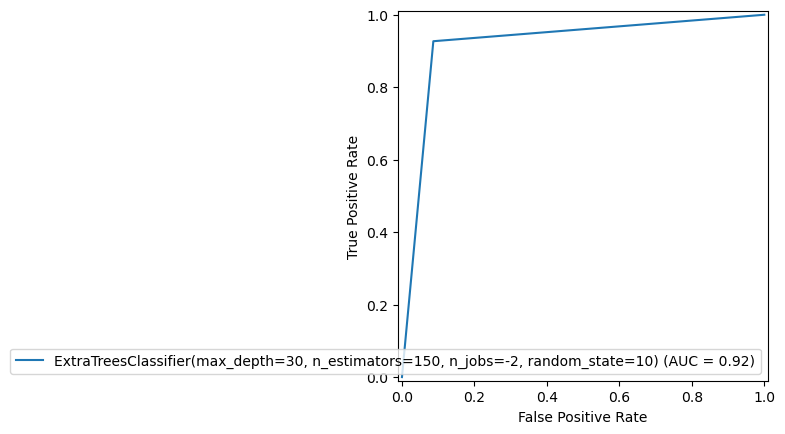

In [180]:
from sklearn import metrics
fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=final_model)
display.plot()

In this project, we're using data to help auto insurance companies catch people who are lying to get money. We have a bunch of information about customers, like how long they've been with the insurance company, their age, and details about their insurance policy. We also have information about accidents they've been in and the claims they've made.

We're going to look at all this information and use it to build a computer program that can predict if a claim is probably fake or not. We'll look for patterns in the data that suggest someone might be trying to cheat the insurance company. This way, insurance companies can stop fraudsters from getting away with dishonest claims, which helps keep insurance costs lower for everyone.




